# Chapter 12. Differentiation

## Differentiation in practice

### Derivatives of elementary functions

In [1]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) - sigmoid(x)**2

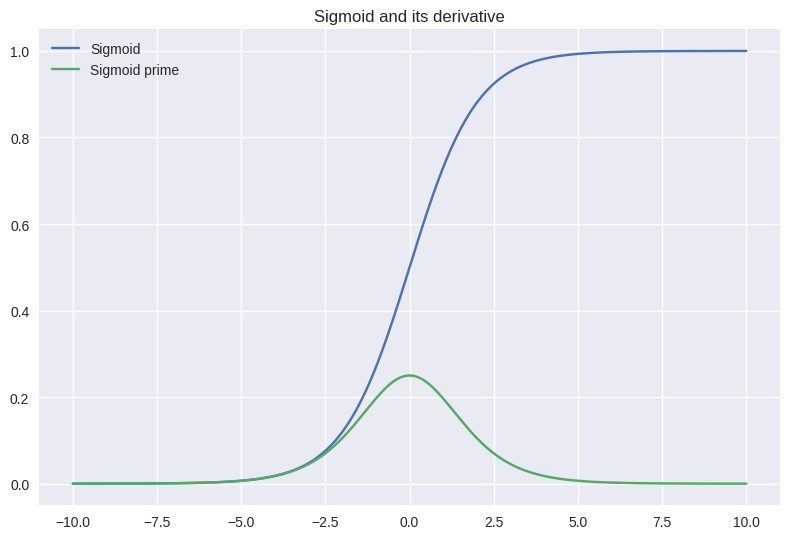

In [2]:
import numpy as np
import matplotlib.pyplot as plt


xs = np.linspace(-10, 10, 1000)

with plt.style.context("seaborn-v0_8"):
    plt.title("Sigmoid and its derivative")
    plt.plot(xs, [sigmoid(x) for x in xs], label="Sigmoid")
    plt.plot(xs, [sigmoid_prime(x) for x in xs], label="Sigmoid prime")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [3]:
def relu(x):
    if x > 0:
        return x
    else:
        return 0

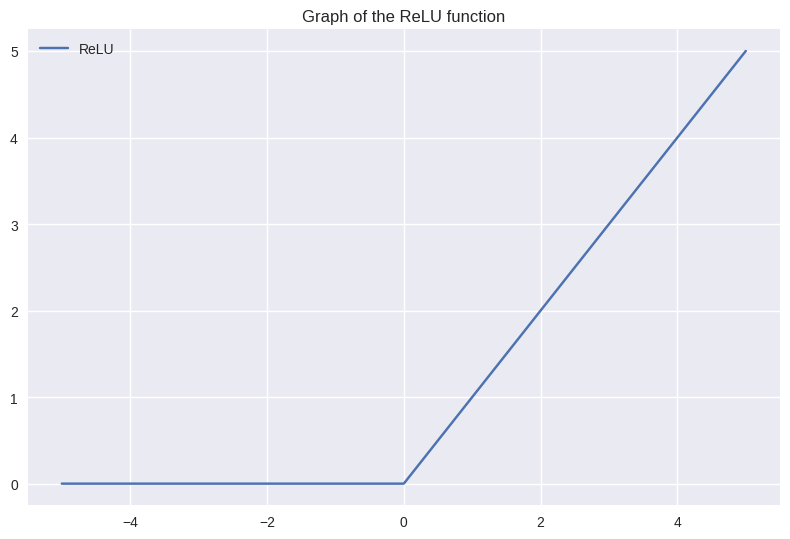

In [4]:
xs = np.linspace(-5, 5, 1000)

with plt.style.context("seaborn-v0_8"):
    plt.title("Graph of the ReLU function")
    plt.plot(xs, [relu(x) for x in xs], label="ReLU")
    plt.legend()
    plt.tight_layout()
    plt.show()

### Extending the `Function` base class

In [5]:
class Function:
    def __init__(self):
        pass
    
    def __call__(self, *args, **kwargs):
        pass
    
    # new interface element for
    # computing the derivative
    def prime(self):
        pass
    
    def parameters(self):
        return dict()

In [6]:
class Sigmoid(Function):
    def __call__(self, x):
        return 1/(1 + np.exp(-x))
    
    def prime(self, x):
        return self(x) - self(x)**2

### The derivative of compositions

In [7]:
class Composition(Function):
    def __init__(self, *functions):
        self.functions = functions
        
    def __call__(self, x):

        for f in self.functions:
            x = f(x)
        
        return x
    
    def prime(self, x):
        forward_pass = [x]
        
        for f in self.functions:
            try:
                x = f(x)
                forward_pass.append(x)
            except ValueError as e:
                print(f"Error in function {f}: {e}")
                return np.nan 
            
        forward_pass.pop()    # removing the last element, as we won't need it
        
        derivative = np.prod([f.prime(x) for f, x in zip(self.functions, forward_pass)])
            
        return derivative

In [8]:
class Linear(Function):
    def __init__(self, a, b):
        self.a = a
        self.b = b
        
    def __call__(self, x):
        return self.a*x + self.b
    
    def prime(self, x):
        return self.a
    
    def parameters(self):
        return {"a": self.a, "b": self.b}

In [9]:
f = Composition(Linear(2, 0), Linear(3, 0), Linear(4, 0))

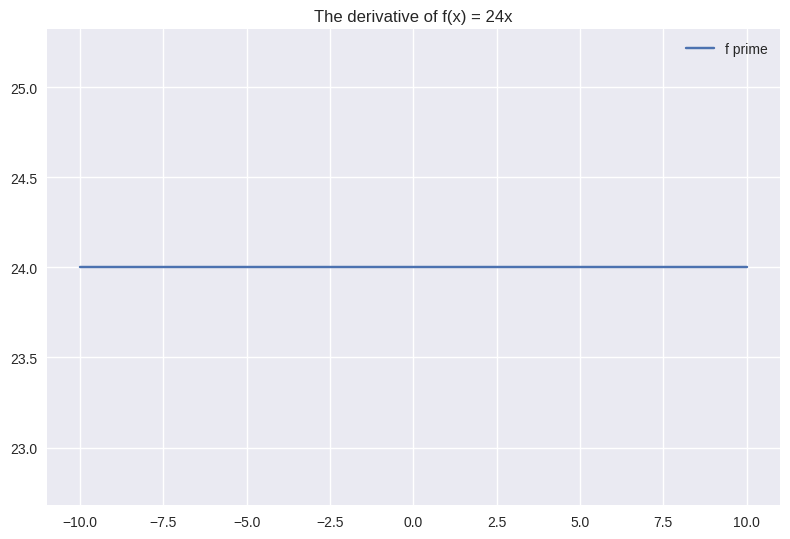

In [10]:
xs = np.linspace(-10, 10, 1000)
ys = [f.prime(x) for x in xs]

with plt.style.context("seaborn-v0_8"):
    plt.title("The derivative of f(x) = 24x")
    plt.plot(xs, ys, label="f prime")
    plt.legend()
    plt.tight_layout()
    plt.show()

### Numerical differentiation

In [11]:
import numpy as np

def f(x):
    return np.sin(x)

In [12]:
def delta(f, h, x):
    return (f(x + h) - f(x))/h

In [13]:
def f_prime(x):
    return np.cos(x)

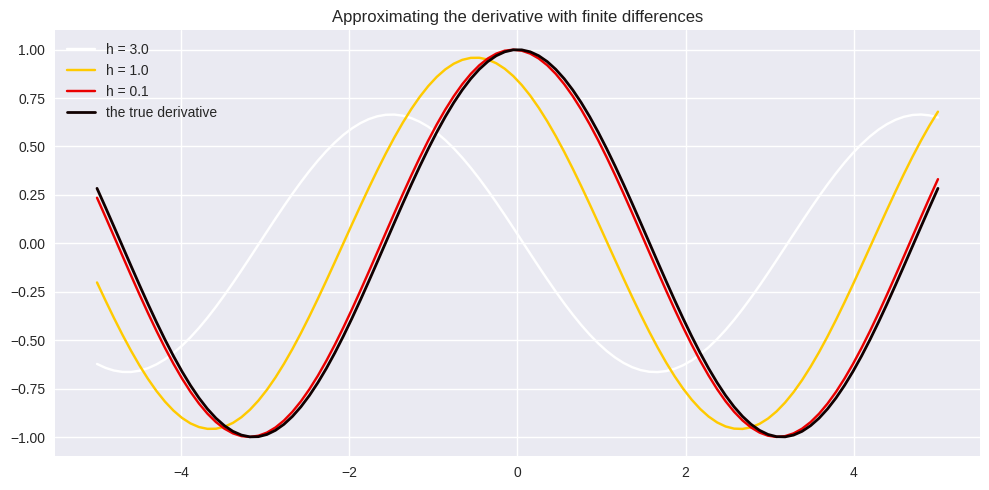

In [14]:
hs = [3.0, 1.0, 0.1]
xs = np.linspace(-5, 5, 100)
f_prime_ys = [f_prime(x) for x in xs]

with plt.style.context("seaborn-v0_8"):
    _colormap = plt.cm.hot_r
    plt.figure(figsize=(10, 5))
    plt.title("Approximating the derivative with finite differences")
    
    true_color = _colormap(0.99)  # Get a fixed color for the true derivative
    for i, h in enumerate(hs):
        ys = [delta(f, h, x) for x in xs]
        blend_ratio = 1 - (len(hs) - i) / len(hs)  # Progressively blend closer to the true color
        approx_color = _colormap(blend_ratio)
        plt.plot(xs, ys, label=f"h = {h}", color=approx_color)
    
    plt.plot(xs, f_prime_ys, label="the true derivative", color=true_color, linewidth=2)
    plt.legend()
    plt.tight_layout()
    plt.show()
